In [2]:
file_path = "C:\\Users\\ts\\Desktop\\AI Test Agent ‰∫ßÂìÅ‰ªãÁªç_v1.2R3.pdf"

In [19]:
# ‰ªé langchain_community ÂØºÂÖ• PDF Âä†ËΩΩÂô®
from langchain_community.document_loaders import PyPDFLoader

# 1. ÂàõÂª∫‰∏Ä‰∏™Âä†ËΩΩÂô®ÂÆû‰æãÔºåÂπ∂ÂëäËØâÂÆÉË¶ÅÂä†ËΩΩÂì™‰∏™Êñá‰ª∂
loader = PyPDFLoader(file_path)
# 2. ÂáÜÂ§á‰∏Ä‰∏™Á©∫ÂàóË°®ÔºåÁî®Êù•Â≠òÊîæÂä†ËΩΩÂêéÁöÑÈ°µÈù¢
pages = []

# 3. ÂºÇÊ≠•ÈÄêÈ°µÂä†ËΩΩÔºàËøôÊòØ‰∏Ä‰∏™È´òÁ∫ßÁî®Ê≥ïÔºâ
async for page in loader.alazy_load():
    pages.append(page)

# print(f"size:{len(pages)}")
# --- ÂçïÂÖÉÊ†º 4: Ê£ÄÊü•Âä†ËΩΩÁªìÊûú ---
# ÊâìÂç∞Á¨¨‰∏ÄÈ°µÁöÑ "ÂÖÉÊï∞ÊçÆ" (metadata)
print(f"{pages[0].metadata}\n")

# ÊâìÂç∞Á¨¨‰∏ÄÈ°µÁöÑ "È°µÈù¢ÂÜÖÂÆπ" (page_content)
print(pages[0].page_content)

{'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creator': 'Microsoft¬Æ PowerPoint¬Æ 2021', 'creationdate': '2025-09-10T18:52:17+08:00', 'moddate': '2025-09-10T10:52:17+00:00', 'source': 'C:\\Users\\ts\\Desktop\\AI Test Agent ‰∫ßÂìÅ‰ªãÁªç_v1.2R3.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}

143,0,10 182,0,12 188,53,34 219,78,60 250,90,101 255,255,255 169,176,184222,230,238 0,0,0
www.thundersoft.com
Copyright¬© 2025 Thundersoft Technology Co., Ltd. All rights reserved.
AI Test Agent ‰∫ßÂìÅ‰ªãÁªç
Êô∫ËÉΩÂåñÊµãËØïËß£ÂÜ≥ÊñπÊ°à


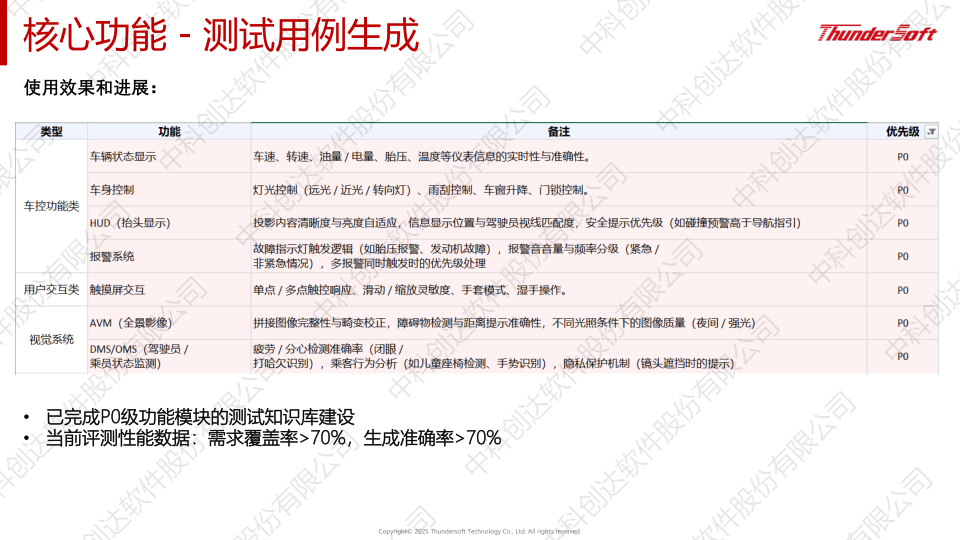

In [3]:
# --- ÂçïÂÖÉÊ†º 1: ÂØºÂÖ•‰æùËµñÂ∫ì ---
import base64
import io
import fitz  # PyMuPDF Â∫ìÔºåÁî®Êù•Êìç‰Ωú PDF
from PIL import Image  # Pillow Â∫ìÔºåÁî®Êù•Â§ÑÁêÜÂõæÂÉè

# --- ÂçïÂÖÉÊ†º 2: ÂÆö‰πâ PDF È°µÈù¢ËΩ¨ Base64 ÂõæÂÉèÁöÑÂáΩÊï∞ ---

def pdf_page_to_base64(pdf_path: str, page_number: int) -> str:
    """
    Â∞Ü PDF ÁöÑÊåáÂÆöÈ°µÈù¢ËΩ¨Êç¢‰∏∫ Base64 ÁºñÁ†ÅÁöÑ PNG ÂõæÂÉèÂ≠óÁ¨¶‰∏≤„ÄÇ
    
    ÂèÇÊï∞:
    pdf_path (str): PDF Êñá‰ª∂ÁöÑË∑ØÂæÑ„ÄÇ
    page_number (int): Ë¶ÅËΩ¨Êç¢ÁöÑÈ°µÁ†Å (‰ªé 1 ÂºÄÂßãËÆ°Êï∞)„ÄÇ
    """
    
    # 1. ‰ΩøÁî® fitz (PyMuPDF) ÊâìÂºÄ PDF Êñá‰ª∂
    pdf_document = fitz.open(pdf_path)
    
    # 2. Âä†ËΩΩÊåáÂÆöÈ°µÈù¢ (fitz ÊòØ 0 Á¥¢ÂºïÁöÑ, ÊâÄ‰ª•Áî®Êà∑‰º†ÂÖ•ÁöÑÁ¨¨ 1 È°µÂØπÂ∫îÁ¥¢Âºï 0)
    # input is one-indexed (ËæìÂÖ•ÊòØ‰ªé1ÂºÄÂßãÁöÑÁ¥¢Âºï)
    page = pdf_document.load_page(page_number - 1) 
    
    # 3. Â∞ÜÈ°µÈù¢Ê∏≤Êüì‰∏∫‚ÄúÂÉèÁ¥†Âõæ‚Äù (pixmap)
    pix = page.get_pixmap()
    
    # 4. ‰ΩøÁî® PIL (Pillow) Â∞ÜÂÉèÁ¥†ÂõæËΩ¨Êç¢‰∏∫ÂõæÂÉèÂØπË±°
    # 'RGB' ÊòØÈ¢úËâ≤Ê®°Âºè, ÂêéÈù¢ÊòØÂõæÂÉèÁöÑÂÆΩ„ÄÅÈ´òÂíåÂéüÂßãÂÉèÁ¥†Êï∞ÊçÆ
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    # 5. ÂàõÂª∫‰∏Ä‰∏™ÂÜÖÂ≠ò‰∏≠ÁöÑ‚Äú‰∫åËøõÂà∂Êñá‰ª∂‚ÄùÁºìÂÜ≤Âå∫
    buffer = io.BytesIO()
    
    # 6. Â∞ÜÂõæÂÉè‰ª• PNG Ê†ºÂºè‰øùÂ≠òÂà∞ÂÜÖÂ≠òÁºìÂÜ≤Âå∫‰∏≠
    img.save(buffer, format="PNG")
    
    # 7. Â∞ÜÁºìÂÜ≤Âå∫‰∏≠ÁöÑÂõæÂÉèÊï∞ÊçÆËøõË°å Base64 ÁºñÁ†ÅÔºåÂπ∂ËøîÂõûÊñáÊú¨Â≠óÁ¨¶‰∏≤
    return base64.b64encode(buffer.getvalue()).decode("utf-8")

# --- ÂçïÂÖÉÊ†º 3: Âú® Jupyter Notebook ‰∏≠ÊòæÁ§∫ÂõæÂÉè ---

from IPython.display import Image as IPImage
from IPython.display import display

# 1. Ë∞ÉÁî®ÂáΩÊï∞ÔºåËé∑ÂèñÁ¨¨ 11 È°µÁöÑ Base64 ÁºñÁ†ÅÂ≠óÁ¨¶‰∏≤
base64_image = pdf_page_to_base64(file_path, 11)

# 2. Âú® Notebook ‰∏≠ÊòæÁ§∫ËøôÂº†ÂõæÁâá
# IPImage ÈúÄË¶ÅÁöÑÊòØÂéüÂßãÁöÑÂõæÂÉèÂ≠óËäÇÔºåÊâÄ‰ª•Êàë‰ª¨ÂÖàÁî® b64decode Ëß£Á†Å
display(IPImage(data=base64.b64decode(base64_image)))

In [4]:
# --- 1. ÂÆö‰πâLLMÊ®°Âûã ---
# Ê≥®ÊÑèÔºö‰Ω†ÈúÄË¶ÅÂÖàËÆæÁΩÆ‰Ω†ÁöÑAPIÂØÜÈí•ÂíåÂèØËÉΩÁöÑËÆøÈóÆÂú∞ÂùÄ‰Ωú‰∏∫ÁéØÂ¢ÉÂèòÈáè
import os
from langchain_openai import ChatOpenAI
model = ChatOpenAI(
    model="doubao-seed-1-6-flash-250828", # Êà™Âõæ‰∏≠‰∏∫ gpt-4o-miniÔºåËøôÊòØ‰∏Ä‰∏™Âº∫Â§ßÁöÑÂ§öÊ®°ÊÄÅÊ®°Âûã
    temperature=0,
    api_key=os.environ.get("DOUBAO-API-KEY"),
    base_url="https://ark.cn-beijing.volces.com/api/v3",
)

# --- ÂçïÂÖÉÊ†º 2: ÊûÑÈÄ†Â§öÊ®°ÊÄÅÊ∂àÊÅØÂπ∂Ë∞ÉÁî® ---
from langchain_core.messages import HumanMessage

# 1. ‰Ω†ÁöÑÊñáÊú¨ÈóÆÈ¢ò
query = "ËΩ¶ÊéßÂäüËÉΩÁ±ªÁöÑ‰ºòÂÖàÁ∫ßÔºü"

# 2. ÂÅáËÆæ 'base64_image' ÂèòÈáèÂ∑≤ÁªèÂ≠òÂú®
#    Ëøô‰∏™ÂèòÈáèÂ∞±ÊòØÊàë‰ª¨‰∏ä‰∏Ä‰∏™‰æãÂ≠ê‰∏≠ pdf_page_to_base64() ÂáΩÊï∞ËøîÂõûÁöÑ
#    ÈÇ£‰∏ÄÈïø‰∏≤ Base64 ÁºñÁ†ÅÁöÑÂõæÂÉèÂ≠óÁ¨¶‰∏≤„ÄÇ
#    (Âú®ËøôÈáå‰Ω†ÈúÄË¶ÅÂÖàËøêË°å‰∏ä‰∏Ä‰∏™‰æãÂ≠êÁöÑ‰ª£Á†ÅÊù•Ëé∑ÂèñÂÆÉ)
#
# -------------------------------------------------------------------
# Á§∫‰æãÔºö‰Ω†ÂèØËÉΩÈúÄË¶ÅÂÖàËøêË°åËøô‰∏ÄÊÆµÊù•Ëé∑Âèñ base64_image
# (ËØ∑Á°Æ‰øù‰Ω†Â∑≤ÁªèÊúâ‰∫Ü‰∏ä‰∏ÄËäÇËØæÁöÑ pdf_page_to_base64 ÂáΩÊï∞Âíå PDF Êñá‰ª∂)
#
# try:
#     base64_image = pdf_page_to_base64(file_path, 11) # ÂÅáËÆæ file_path ‰πüÂ∑≤ÂÆö‰πâ
# except NameError:
#     print("ÈîôËØØÔºöËØ∑ÂÖàÂÆö‰πâ pdf_page_to_base64 ÂáΩÊï∞Âíå file_path ÂèòÈáè")
#     base64_image = "" # Áªô‰∏Ä‰∏™Á©∫ÂÄºÈò≤Ê≠¢‰∏ãÈù¢‰ª£Á†ÅÊä•Èîô
# -------------------------------------------------------------------


# 3. ÊûÑÈÄ†‰∏Ä‰∏™ÂåÖÂê´‚ÄúÊñáÊú¨‚ÄùÂíå‚ÄúÂõæÂÉè‚ÄùÁöÑ HumanMessage
message = HumanMessage(
    content=[
        {
            "type": "text", 
            "text": query
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        }
    ]
)

# 4. Â∞ÜËøô‰∏™‚ÄúÂõæÊñáÂπ∂ËåÇ‚ÄùÁöÑÊ∂àÊÅØÂèëÈÄÅÁªô LLM
response = model.invoke([message])

# 5. ÊâìÂç∞ LLM ÁöÑÂõûÁ≠î
print(response.content)

‰ªéÊèê‰æõÁöÑPPTË°®Ê†ºÂèäÁõ∏ÂÖ≥‰ø°ÊÅØÊù•ÁúãÔºå**ËΩ¶ÊéßÂäüËÉΩÁ±ªÁöÑ‰ºòÂÖàÁ∫ßÂùá‰∏∫P0ÔºàÊúÄÈ´ò‰ºòÂÖàÁ∫ßÔºâ**ÔºåÂÖ∑‰ΩìÂàÜÊûêÂ¶Ç‰∏ãÔºö


### **1. ËΩ¶ÊéßÂäüËÉΩÁ±ªÁöÑËåÉÂõ¥‰∏é‰ºòÂÖàÁ∫ß**  
PPT‰∏≠‚ÄúËΩ¶ÊéßÂäüËÉΩÁ±ª‚ÄùÂåÖÂê´4‰∏™Â≠êÂäüËÉΩÔºåÊØè‰∏™ÂäüËÉΩÁöÑ‰ºòÂÖàÁ∫ßÂùáÊ†áÊ≥®‰∏∫ **P0**Ôºö  
- **ËΩ¶ËæÜÁä∂ÊÄÅÊòæÁ§∫**ÔºöËΩ¶ÈÄü„ÄÅËΩ¨ÈÄü„ÄÅÊ≤πÈáè/ÁîµÈáè„ÄÅËÉéÂéã„ÄÅÊ∏©Â∫¶Á≠â‰ª™Ë°®‰ø°ÊÅØÁöÑÂÆûÊó∂ÊÄß‰∏éÂáÜÁ°ÆÊÄß„ÄÇ  
- **ËΩ¶Ë∫´ÊéßÂà∂**ÔºöÁÅØÂÖâÊéßÂà∂ÔºàËøúÂÖâ/ËøëÂÖâ/ËΩ¨ÂêëÁÅØÔºâ„ÄÅÈõ®ÂàÆÊéßÂà∂„ÄÅËΩ¶Á™óÂçáÈôç„ÄÅÈó®ÈîÅÊéßÂà∂„ÄÇ  
- **HUDÔºàÊä¨Â§¥ÊòæÁ§∫Ôºâ**ÔºöÊäïÂΩ±ÂÜÖÂÆπÊ∏ÖÊô∞Â∫¶‰∏é‰∫ÆÂ∫¶Ëá™ÈÄÇÂ∫î„ÄÅ‰ø°ÊÅØÊòæÁ§∫‰ΩçÁΩÆÂåπÈÖçÂ∫¶„ÄÅÂÆâÂÖ®ÊèêÁ§∫‰ºòÂÖàÁ∫ßÔºàÂ¶ÇÁ¢∞ÊíûÈ¢ÑË≠¶È´ò‰∫éÂØºËà™ÊåáÂºïÔºâ„ÄÇ  
- **Êä•Ë≠¶Á≥ªÁªü**ÔºöÊïÖÈöúÊåáÁ§∫ÁÅØËß¶ÂèëÈÄªËæë„ÄÅÊä•Ë≠¶Èü≥Èáè/È¢ëÁéáÂàÜÁ∫ß„ÄÅÂ§öÊä•Ë≠¶ÂêåÊó∂Ëß¶ÂèëÁöÑ‰ºòÂÖàÁ∫ßÂ§ÑÁêÜ„ÄÇ  


### **2. P0‰ºòÂÖàÁ∫ßÁöÑÂê´‰πâ‰∏éÂêàÁêÜÊÄß**  
P0ÈÄöÂ∏∏‰ª£Ë°®**ÊúÄÈ´ò‰ºòÂÖàÁ∫ß**ÔºåÂç≥‚ÄúÂøÖÈ°ªË¶ÜÁõñ„ÄÅÊ†∏ÂøÉ‰∏îÁõ¥Êé•ÂΩ±ÂìçÂÆâÂÖ®/Âü∫Á°Ä‰ΩìÈ™åÁöÑÂäüËÉΩ‚Äù„ÄÇÁªìÂêàËΩ¶ÊéßÂäüËÉΩÁöÑÂÖ∑‰ΩìÂú∫ÊôØÔ

In [11]:
import os
from openai import OpenAI

# ËØ∑Á°Æ‰øùÊÇ®Â∑≤Â∞Ü API Key Â≠òÂÇ®Âú®ÁéØÂ¢ÉÂèòÈáè ARK_API_KEY ‰∏≠
# ÂàùÂßãÂåñArkÂÆ¢Êà∑Á´ØÔºå‰ªéÁéØÂ¢ÉÂèòÈáè‰∏≠ËØªÂèñÊÇ®ÁöÑAPI Key
client = OpenAI(
    # Ê≠§‰∏∫ÈªòËÆ§Ë∑ØÂæÑÔºåÊÇ®ÂèØÊ†πÊçÆ‰∏öÂä°ÊâÄÂú®Âú∞ÂüüËøõË°åÈÖçÁΩÆ
    base_url="https://ark.cn-beijing.volces.com/api/v3",
    # ‰ªéÁéØÂ¢ÉÂèòÈáè‰∏≠Ëé∑ÂèñÊÇ®ÁöÑ API Key„ÄÇÊ≠§‰∏∫ÈªòËÆ§ÊñπÂºèÔºåÊÇ®ÂèØÊ†πÊçÆÈúÄË¶ÅËøõË°å‰øÆÊîπ
    api_key="",
)

response = client.chat.completions.create(
    # ÊåáÂÆöÊÇ®ÂàõÂª∫ÁöÑÊñπËàüÊé®ÁêÜÊé•ÂÖ•ÁÇπ IDÔºåÊ≠§Â§ÑÂ∑≤Â∏ÆÊÇ®‰øÆÊîπ‰∏∫ÊÇ®ÁöÑÊé®ÁêÜÊé•ÂÖ•ÁÇπ ID
    model="doubao-seed-1-6-flash-250828",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://ark-project.tos-cn-beijing.ivolces.com/images/view.jpeg"
                    },
                },
                {"type": "text", "text": "ËøôÊòØÂì™ÈáåÔºü"},
            ],
        }
    ],
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='ËøôÂº†ÂõæÁâáÂ±ïÁ§∫ÁöÑÊòØ‰∏ÄÂ§ÑÊã•ÊúâÂ£Æ‰∏ΩÈõ™Â±±„ÄÅËåÇÂØÜÊ£ÆÊûóÂíåÂÆÅÈùôÊπñÊ≥äÁöÑËá™ÁÑ∂ÊôØËßÇÔºåÂæàÂèØËÉΩ‰Ωç‰∫é**ÂåóÁæéÊ¥≤ÁöÑËêΩÂü∫Â±±ËÑâÂå∫Âüü**ÔºåÂÖ∑‰ΩìÊù•ËØ¥ÔºåËøôÁ±ªÊôØËßÇÂ∏∏ËßÅ‰∫éÂä†ÊãøÂ§ßÊàñÁæéÂõΩÁöÑÂõΩÂÆ∂ÂÖ¨Âõ≠ÂÜÖÔºå‰æãÂ¶ÇÔºö\n\n\n### ÂÖ∏ÂûãÂú∞ÁÇπÊé®ÊµãÔºö\n1. **Âä†ÊãøÂ§ßËêΩÂü∫Â±±ËÑâ**ÔºàÂ¶ÇÁè≠Â§´ÂõΩÂÆ∂ÂÖ¨Âõ≠„ÄÅË¥æÊñØÁèÄÂõΩÂÆ∂ÂÖ¨Âõ≠ÔºâÔºö  \n   ËøôÈáåÊúâÁø°Áø†Êπñ„ÄÅË∑ØÊòìÊñØÊπñÁ≠âËëóÂêçÈ´òÂ±±ÊπñÊ≥äÔºåÈõ™Â±±„ÄÅÈíàÂè∂Êûó‰∏éÊæÑÊæàÊπñÊ∞¥ÊûÑÊàêÁªùÁæéÁîªÂç∑ÔºåÊòØÁöÆÂàíËâá„ÄÅÂæíÊ≠•Á≠âÊà∑Â§ñÁà±Â•ΩËÄÖÁöÑÁÉ≠Èó®ÁõÆÁöÑÂú∞„ÄÇ\n\n2. **ÁæéÂõΩÂ§ßÊèêÈ°øÂõΩÂÆ∂ÂÖ¨Âõ≠/ÈªÑÁü≥ÂõΩÂÆ∂ÂÖ¨Âõ≠**ÔºàÊÄÄ‰øÑÊòéÂ∑ûÔºâÔºö  \n   Êù∞ÂÖãÈÄäÊπñ„ÄÅÈªÑÁü≥ÊπñÂë®ËæπÂêåÊ†∑ÊúâÈõ™Â±±Ê£ÆÊûóÁéØÁªïÁöÑÊπñÊ≥äÊôØËßÇÔºå‰∏éÂõæ‰∏≠Âú∞Ë≤åÈ´òÂ∫¶Â•ëÂêà„ÄÇ\n\n\n### Ê†∏ÂøÉÁâπÂæÅÔºö\n- **Âú∞ÁêÜÂÖÉÁ¥†**ÔºöÂÜ∞Â∑ù‰ΩúÁî®ÂΩ¢ÊàêÁöÑÈ´òÂ±±ÊπñÊ≥ä„ÄÅÁßØÈõ™Ë¶ÜÁõñÁöÑËêΩÂü∫Â±±ËÑâ„ÄÅËåÇÂØÜÁöÑÈíàÂè∂ÊûóÔºàÂ¶ÇÊùæ„ÄÅ‰∫ëÊùâÔºâÔºåÂÖ±ÂêåÊûÑÊàê‰∫Ü‚ÄúÈõ™Â±±‚ÄîÊ£ÆÊûó‚ÄîÊ

In [5]:
import bs4 # ÂØºÂÖ• bs4 (beautifulsoup4)ÔºåÂç≥‰ΩøÊ≤°ÊòæÂºèË∞ÉÁî®ÔºåWebBaseLoader ‰πü‰ºöÂú®ÂÜÖÈÉ®‰ΩøÁî®ÂÆÉ
from langchain_community.document_loaders import WebBaseLoader

# 1. ÂÆö‰πâ‰Ω†ÊÉ≥Ë¶ÅÊäìÂèñÁöÑÁΩëÈ°µ URL
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

# 2. ÂàõÂª∫‰∏Ä‰∏™ WebBaseLoader ÂÆû‰æã
#    Ê≥®ÊÑèÂèÇÊï∞ÊòØ web_paths (Â§çÊï∞)ÔºåÂÆÉÊé•Âèó‰∏Ä‰∏™ URL ÂàóË°®
loader = WebBaseLoader(web_paths=[page_url])

# 3. ÂºÇÊ≠•ÈÄêÈ°µÂä†ËΩΩ (Âõ†‰∏∫Êàë‰ª¨Âè™‰º†‰∫Ü‰∏Ä‰∏™ URLÔºåÊâÄ‰ª•Âè™‰ºöÂä†ËΩΩ‰∏Ä‰∏™ "doc")
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

# --- ÂçïÂÖÉÊ†º 3: Ê£ÄÊü•ÂíåÊâìÂç∞ÁªìÊûú ---

# 1. Êñ≠Ë®ÄÔºöÁ°Æ‰øùÊàë‰ª¨Âè™Âä†ËΩΩÂà∞‰∫Ü 1 ‰∏™ÊñáÊ°£
assert len(docs) == 1

# 2. ÊääÂîØ‰∏ÄÁöÑÊñáÊ°£‰ªéÂàóË°®‰∏≠ÂèñÂá∫Êù•ÔºåÊñπ‰æøÊìç‰Ωú
doc = docs[0]

# 3. ÊâìÂç∞ÂÖÉÊï∞ÊçÆ (metadata)
print(f"{doc.metadata}\n")

# 4. ÊâìÂç∞È°µÈù¢ÂÜÖÂÆπ (Âè™ÊâìÂç∞Ââç 500 ‰∏™Â≠óÁ¨¶ÔºåÂπ∂ÂéªÈô§È¶ñÂ∞æÁ©∫Ê†º)
print(doc.page_content[:500].strip())

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 1/1 [00:00<00:00,  3.40it/s]

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/', 'title': 'How to add memory to chatbots | ü¶úÔ∏èüîó LangChain', 'description': 'A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:', 'language': 'en'}

How to add memory to chatbots | ü¶úÔ∏èüîó LangChain








Skip to main content‚ö†Ô∏è THESE DOCS ARE OUTDATED. Visit the new v1.0 docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseindexBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extra


In [7]:
# --- 1. ÂºïÂÖ•‰æùËµñÂåÖ ---
# ÂØºÂÖ• bs4 (beautifulsoup4) ÊòØÂøÖÈ°ªÁöÑÔºåÂõ†‰∏∫Êàë‰ª¨Ë¶ÅÁî®Âà∞ÂÆÉÁöÑ SoupStrainer
import bs4 
from langchain_community.document_loaders import WebBaseLoader

# --- 2. ÂÆö‰πâË¶ÅÊäìÂèñÁöÑ URL ---
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

# --- 4. ÂÆû‰æãÂåñÂä†ËΩΩÂô®ÔºåÂπ∂‰º†ÂÖ•Êàë‰ª¨ÁöÑÂÆöÂà∂ÂèÇÊï∞ ---
loader = WebBaseLoader(
    web_paths=[page_url],
    bs_get_text_kwargs={"separator": " | ", "strip": True}  # <--- Âú®ËøôÈáåÊääÊàë‰ª¨ÁöÑ‚ÄúËøáÊª§Âô®‚Äù‰º†ËøõÂéª
)

# --- 5. Âä†ËΩΩÊñáÊ°£ ---
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

assert len(docs) == 1
doc = docs[0]

# --- 6. ÊâìÂç∞ÁªìÊûú ---
# ÊâìÂç∞ÂÖÉÊï∞ÊçÆ
print(f"{doc.metadata}\n")

# ÊâìÂç∞È°µÈù¢ÂÜÖÂÆπ (Âè™ÊâìÂç∞Ââç 500 ‰∏™Â≠óÁ¨¶)
# ‰Ω†‰ºöÂèëÁé∞ÔºåËøôÊ¨°ÁöÑÂÜÖÂÆπÂπ≤ÂáÄÂ§ö‰∫ÜÔºåÊ≤°ÊúâÂØºËà™Ê†è‰ø°ÊÅØ‰∫Ü
print(doc.page_content[:500])

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.79it/s]

{'source': 'https://python.langchain.com/docs/how_to/chatbots_memory/', 'title': 'How to add memory to chatbots | ü¶úÔ∏èüîó LangChain', 'description': 'A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:', 'language': 'en'}

How to add memory to chatbots | ü¶úÔ∏èüîó LangChain | Skip to main content | ‚ö†Ô∏è THESE DOCS ARE OUTDATED. | Visit the new v1.0 docs | Integrations | API Reference | More | Contributing | People | Error reference | LangSmith | LangGraph | LangChain Hub | LangChain JS/TS | v0.3 | v0.3 | v0.2 | v0.1 | üí¨ | Search | Introduction | Tutorials | Build a Question Answering application over a Graph Database | index | Build a simple LLM application with chat models and prompt templates | Build a Chatbot | Build a


In [13]:
from langchain_unstructured import UnstructuredLoader

page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

loader = WebBaseLoader(page_url)

docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

# print(f"UnstructuredLoader Âä†ËΩΩÂπ∂ÂàÜÂâ≤Êàê‰∫Ü {len(docs)} ‰∏™ÊñáÊ°£Âùó„ÄÇ\n")

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  2.69it/s]


In [14]:
for doc in docs[:5]:
    print("--- (Êñ∞ÊñáÊ°£Âùó) ---")
    print(doc.page_content)
    print("\n")

--- (Êñ∞ÊñáÊ°£Âùó) ---





How to add memory to chatbots | ü¶úÔ∏èüîó LangChain








Skip to main content‚ö†Ô∏è THESE DOCS ARE OUTDATED. Visit the new v1.0 docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseindexBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesindexHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model responsesHow to add default invocat

# Âä†ËΩΩ CSV

In [20]:
from langchain_community.document_loaders.csv_loader import CSVLoader

file_path = "../materials/test.csv"
print(f"Êñá‰ª∂ÊòØÂê¶Â≠òÂú®: {os.path.exists(file_path)}")

loader = CSVLoader(file_path)

data = loader.load()

for record in data[:2]:
    print(record)
    
    
loader = CSVLoader(file_path, source_column="Project")

data = loader.load()

for record in data[:2]:
    print(record)

Êñá‰ª∂ÊòØÂê¶Â≠òÂú®: True
page_content='Project: A
Numbers: 25' metadata={'source': '../materials/test.csv', 'row': 0}
page_content='Project: B
Numbers: 38' metadata={'source': '../materials/test.csv', 'row': 1}
page_content='Project: A
Numbers: 25' metadata={'source': 'A', 'row': 0}
page_content='Project: B
Numbers: 38' metadata={'source': 'B', 'row': 1}


# Ëá™ÂÆö‰πâÊñáÊ°£Âä†ËΩΩÂô®

In [21]:
from typing import AsyncIterator, Iterator
from langchain_core.document_loaders import BaseLoader
from langchain_core.documents import Document

class CustomDocumentLoader(BaseLoader):
    """ÈÄöË°åËØªÂèñÊñá‰ª∂ÁöÑÊñáÊ°£Âä†ËΩΩÂô®Á§∫‰æã"""
    
    def __init__(self, file_path: str) -> None:
        """‰ΩøÁî®Êñá‰ª∂Ë∑ØÂæÑÂàùÂßãÂåñÂä†ËΩΩÂô®
        
        ÂèÇÊï∞:
            file_path: Ë¶ÅÂä†ËΩΩÁöÑÊñá‰ª∂Ë∑ØÂæÑ
        """
        self.file_path = file_path

    def lazy_load(self) -> Iterator[Document]:
        """ËøõË°åËØªÂèñÊñá‰ª∂ÁöÑÊÄßËÉΩÂä†ËΩΩÂô®
        
        ÂΩìÂÆûÁé∞ÊáíÂä†ËΩΩÊñπÊ≥ïÊó∂Ôºå‰Ω†Â∫îËØ•‰ΩøÁî®ÁîüÊàêÂô®
        ‰∏ÄÊ¨°ÁîüÊàê‰∏Ä‰∏™ÊñáÊ°£
        """
        with open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

    # alazy_load ÊòØÂèØË∞ÉÁî®ÁöÑ
    # Â¶ÇÊûú‰∏çÂÆûÁé∞ÂÆÉÔºåÂ∞Ü‰ΩøÁî®‰∏Ä‰∏™ÈªòËÆ§ÂÆûÁé∞ÔºåËØ•ÂÆûÁé∞‰ºöÂßîÊâòÁªô lazy_load!
    async def alazy_load(
        self,
    ) -> AsyncIterator[Document]:  # -- ‰∏çÊé•Âèó‰ªª‰ΩïÂèÇÊï∞
        """ÈÄêË°åËØªÂèñÊñá‰ª∂ÁöÑÂºÇÊ≠•ÊÄßÂä†ËΩΩ"""
        # ÈúÄË¶ÅÂÆâË£Ö aiofilesÔºàÈÄöËøá pip ÂÆâË£ÖÔºâ
        # https://github.com/Tinche/aiofiles
        import aiofiles

        async with aiofiles.open(self.file_path, encoding="utf-8") as f:
            line_number = 0
            async for line in f:
                yield Document(
                    page_content=line,
                    metadata={"line_number": line_number, "source": self.file_path},
                )
                line_number += 1

In [22]:
# ÂàõÂª∫ÊµãËØïÊñá‰ª∂
with open("meow.txt", "w", encoding="utf-8") as f:
    quality_content = "meow meowüòª\nmeow meowüòª\nmeowüòªüòª"
    f.write(quality_content)

# ‰ΩøÁî®Ëá™ÂÆö‰πâÂä†ËΩΩÂô®
loader = CustomDocumentLoader("meow.txt")

## ÊµãËØïÂä†ËΩΩÂô®
for doc in loader.lazy_load():
    print()
    print(type(doc))
    print(doc)


<class 'langchain_core.documents.base.Document'>
page_content='meow meowüòª
' metadata={'line_number': 0, 'source': 'meow.txt'}

<class 'langchain_core.documents.base.Document'>
page_content='meow meowüòª
' metadata={'line_number': 1, 'source': 'meow.txt'}

<class 'langchain_core.documents.base.Document'>
page_content='meowüòªüòª' metadata={'line_number': 2, 'source': 'meow.txt'}
